<a href="https://colab.research.google.com/github/Utomi-Tom/Cat-and-Dog-Computer-vision-classification/blob/main/Cat_and_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Introduciton



*Problem Statement*





**Aim of modelling application**


# Importation of Tools

In [1]:
import tensorflow as tf
from tensorflow import keras


import matplotlib.pyplot as plt


# Importation of Dataset

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
loc = "/content/drive/MyDrive/dog vs cat/dataset/training_set"

In [4]:
data=tf.keras.utils.image_dataset_from_directory(loc, label_mode="categorical", batch_size=32, image_size=(200, 200),
                                                    )

Found 8000 files belonging to 2 classes.


In [ ]:
# Let us view the raw data values of ten 4D image tensors
data.next()

(array([[[[100.35297  ,  70.35297  ,  18.352968 ],
          [105.       ,  75.2425   ,  20.7575   ],
          [107.79765  ,  78.79765  ,  21.322657 ],
          ...,
          [ 39.42511  ,  38.42511  ,  20.42511  ],
          [ 25.544012 ,  23.786535 ,   8.058966 ],
          [ 25.4375   ,  21.4375   ,  12.4375   ]],
 
         [[101.555    ,  71.555    ,  19.555    ],
          [106.3125   ,  76.555    ,  22.07     ],
          [108.7875   ,  79.7875   ,  22.3125   ],
          ...,
          [ 37.601643 ,  34.601643 ,  17.601643 ],
          [ 27.818516 ,  24.818516 ,   9.333469 ],
          [ 27.3125   ,  23.3125   ,  14.3125   ]],
 
         [[104.43     ,  73.43     ,  19.43     ],
          [109.       ,  78.       ,  23.615469 ],
          [111.61328  ,  80.751564 ,  23.76328  ],
          ...,
          [ 33.149254 ,  27.149252 ,  13.149252 ],
          [ 29.430023 ,  23.430023 ,   8.944977 ],
          [ 30.1875   ,  26.1875   ,  15.1875   ]],
 
         ...,
 
         [[1

# Preprocessing and Visualization 

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


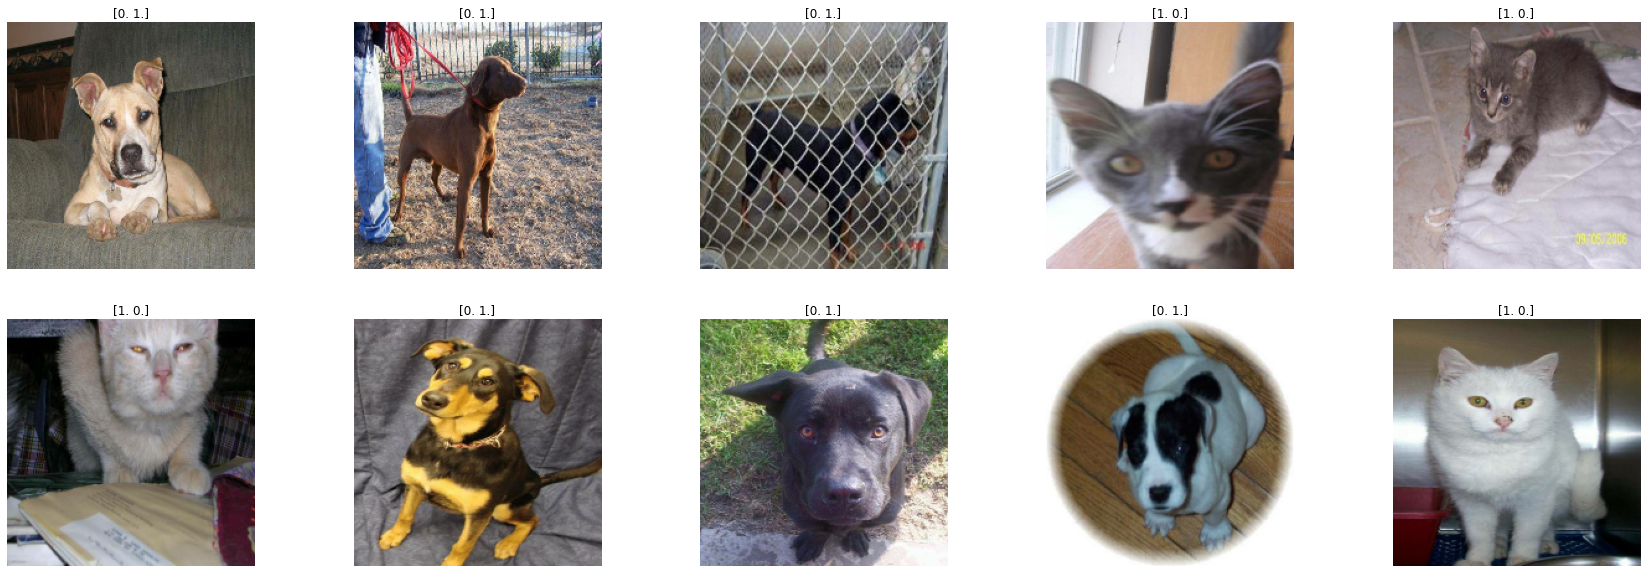

In [11]:
plt.figure(figsize=(30, 10))
for image, label in data.take(1):
  for i in range (10):
    plt.subplot(2,5, i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(label[i].numpy())



In [ ]:
# Having displayed the pictures I think I would have to adjust shapes of all images to standard at the top line 30

# Training model

In [6]:
model = tf.keras.Sequential([])

model.add(tf.keras.layers.InputLayer(input_shape=(200, 200, 3)))
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255.0,))

model.add(tf.keras.layers.Conv2D(150, 3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(7,3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(2))

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss= tf.keras.losses.BinaryFocalCrossentropy(from_logits=True),
              metrics = ["accuracy"])

In [5]:
# Partition Dataset into train, validation and test sets

train_set = data.take(150)
valid_set = data.skip(150).take(60)
test_set = data.skip(150 + 60).take(40)

In [ ]:
history = model.fit(train_set, validation_data=valid_set, verbose=1, epochs=50)

Epoch 1/50
